# **Data Profiling, Cleaning & EDA for Solar Data Set in Sieraleone**

### **Dataset Overview**  

The dataset contains solar radiation  measurements, weather conditions and their impact on solar energy generation. Each row represents a recorded observation at specific time with key variables related to solar irradiance, temperature, pressure, humidity,Precipitation, wind conditions, and sensor readings of radation,and temprature.  

#### **Key Variables:**  
- **Timestamp (yyyy-mm-dd hh:mm):** Date and time of each recorded observation.  
- **Solar Irradiance Metrics:**  
  - **GHI (W/m²):** Global Horizontal Irradiance—total solar radiation on a horizontal surface.  
  - **DNI (W/m²):** Direct Normal Irradiance—solar radiation received per unit area perpendicular to sunlight.  
  - **DHI (W/m²):** Diffuse Horizontal Irradiance—solar radiation received indirectly due to scattering.  
  - **ModA / ModB (W/m²):** Irradiance measurements from specific sensors or modules.  
- **Environmental Conditions:**  
  - **Tamb (°C):** Ambient temperature.  
  - **RH (%):** Relative humidity.  
  - **BP (hPa):** Barometric pressure.  
- **Wind Data:**  
  - **WS (m/s):** Wind speed.  
  - **WSgust (m/s):** Maximum wind gust speed.  
  - **WSstdev (m/s):** Standard deviation of wind speed (variability).  
  - **WD (°N):** Wind direction in degrees from north.  
  - **WDstdev:** Standard deviation of wind direction.  
- **Cleaning & Precipitation:**  
  - **Cleaning (1/0):** Indicates whether a cleaning event occurred.  
  - **Precipitation (mm/min):** Rainfall rate measured in millimeters per minute.  
- **Module Temperature:**  
  - **TModA / TModB (°C):** Temperatures of individual solar modules.  
- **Comments:** A column for additional observations or notes.  

This dataset serves as a foundation for analyzing solar energy potential, identifying trends, and optimizing maintenance strategies.


# **Environment Setup**
Before deep dive in to analysis of the data ,we neee to import all neccessary packages and modules.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore



# **Data Loading**
we start analysis by loading dataset from the country


In [2]:
df=pd.read_csv("../data/raw/sierraleone-bumbuna.csv")


# **Basic inspection**
Before we start the actual analysis, its recommended to have basic understanding what the data looks like including  shape of the data,few samples of the raw data,and data type of each column.

In [3]:
print("     ")
print("  Dataset Shape:",df.shape)
print("  Dataset Dimension:",df.ndim)
print("  Dataset Columns:", list(df.columns))
print("  Basic Dataset info:\n",df.info())
print("  Data samples:\n",df.head(n=2))
print("  Data samples:\n",df.tail(n=2))

     
  Dataset Shape: (525600, 19)
  Dataset Dimension: 2
  Dataset Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WD

## **Exploratory Data Analysis (EDA)**


 **Descriptive stastics and summary**

Statistical summary of numerical columns, including count, mean, standard deviation,percentile, min, and max values.

In [4]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


**Data Quality Assessment**

Checking the quality and reliablity (Duplication,missing value,range of variables,data format) of the  data is important before to coplex analysis.

**.**  Humidity (RH) should always be between 0% and 100%

**.**  Temperatures (Tamb, TModA, TModB) should be realistic.

**.**  Right Format

**.**  Radiation (GHI, DNI, DHI, ModA, ModB) should never be negative.


**Looking and handling for dublicate entries**

In [5]:
dublicates=df.duplicated()
print("  Duplicates in the dataset:\n",dublicates.sum())
# Remove duplicate rows and report how many were dropped
duplicates_count = dublicates.sum()
if duplicates_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"  {duplicates_count} duplicate rows removed.")
else:
    print("  No duplicate rows found.")

  Duplicates in the dataset:
 0
  No duplicate rows found.


**Looking and Handling missing values**

In [6]:
missing_values = df.isnull().sum()

if missing_values.sum() > 0:
    print("  Missing values in the dataset:\n", missing_values[missing_values > 0])
    print("  Total missing values in the dataset:", missing_values[missing_values > 0].sum())
    df.fillna(df.mean(numeric_only=True), inplace=True) 
    print("  Missing values have been filled with the mean of their respective columns.")
else:
    print("  No missing values found in the dataset.")

  Missing values in the dataset:
 Comments    525600
dtype: int64
  Total missing values in the dataset: 525600
  Missing values have been filled with the mean of their respective columns.


**Outlier detection**

In [7]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb','Precipitation']
numeric_cols_for_zscore = [col for col in columns_to_check if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]
if not numeric_cols_for_zscore:
    print("  No numeric columns found for z-score calculation.")
    
z_scores=df[numeric_cols_for_zscore].apply(zscore) #calculating z-score for the columns
outlier_flags = (np.abs(z_scores) > 3) # flagging outliers
rows_with_outliers = df[outlier_flags.any(axis=1)] # extracting rows with outliers
print("  Number of rows with outliers:", len(rows_with_outliers))

if len(rows_with_outliers) > 0:
    print("  Outlier rows:\n", rows_with_outliers)
    print("  Rows with outliers:\n", rows_with_outliers)
else:
    print("  No outliers found in the dataset.")


  Number of rows with outliers: 19943
  Outlier rows:
                Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
208     2021-10-30 03:29   -1.0   -0.1   -1.1    0.0    0.0  22.2  98.1  0.6   
293     2021-10-30 04:54   -1.0   -0.2   -1.2    0.0    0.0  22.2  97.7  2.0   
653     2021-10-30 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
654     2021-10-30 10:55  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
655     2021-10-30 10:56  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
522184  2022-10-27 15:05  167.2   -0.5  165.1  167.6  160.9  30.4  68.3  5.3   
522185  2022-10-27 15:06  163.4   -0.6  161.0  165.7  159.2  30.2  67.7  7.1   
522194  2022-10-27 15:15  183.5    0.3  181.6  173.7  168.7  29.3  70.2  4.9   
523792  2022-10-28 17:53   31.3   -0.5   30.2   34.3   32.3  28.4  79.5  5.0   
523794  2022-10-28 17:55   22.8   -0.8   21.4   26.5   25.0  27.9

**Data Cleaning**
  
  To make the dataset analysis-ready, we need to fix any  Outliers using statistical methods like IQR or Z-score. We also check for temporal consistency, ensuring the data follows logical time-based trends without sudden, unexplained jumps.



In [8]:
def clean_solar_data(df: pd.DataFrame) -> pd.DataFrame:
    """Full cleaning pipeline with outlier handling"""
    cleaned_df = df.copy()

    # Remove duplicates
    cleaned_df = cleaned_df.drop_duplicates()

    # Handle missing values
    cleaned_df = cleaned_df.drop(columns='Comments', errors='ignore')
    cleaned_df = cleaned_df.ffill() # Forward fill missing values

    # Convert relevant columns to numeric types before fixing invalid values
    all_numeric_cols = list(numeric_cols_for_zscore) 
    if 'RH' not in all_numeric_cols:
        all_numeric_cols.append('RH')

    for col in all_numeric_cols:
        if col in cleaned_df.columns:
            cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
        else:
            print(f"Warning: Column '{col}' not found in DataFrame for numeric conversion.")

    # Fix invalid values (after ensuring they are numeric)
    
    for col in numeric_cols_for_zscore:
        if col in cleaned_df.columns:
            cleaned_df[col] = cleaned_df[col].clip(lower=0)

    # Apply clipping specifically to 'RH'
    if 'RH' in cleaned_df.columns:
        cleaned_df['RH'] = cleaned_df['RH'].clip(0, 100)

    # Remove outliers using IQR method
    initial_index = cleaned_df.index
    outlier_mask = pd.Series(False, index=initial_index) 

    for col in numeric_cols_for_zscore:
        if col in cleaned_df.columns and cleaned_df[col].dtype in ['float64', 'int64']:
            q1 = cleaned_df[col].quantile(0.25)
            q3 = cleaned_df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            outlier_mask = outlier_mask | ~((cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound))
        else:
            print(f"Warning: Column '{col}' is not numeric or does not exist for IQR outlier removal.")

    # Filter out rows identified as outliers
    cleaned_df = cleaned_df[~outlier_mask]

    return cleaned_df.reset_index(drop=True)

cleaned_df = clean_solar_data(df=df)
cleaned_df.to_csv(path_or_buf="../data/processed/sierraleone_clean.csv")

# **Data Ploting and Visualaization**

**Time Series Analysis**

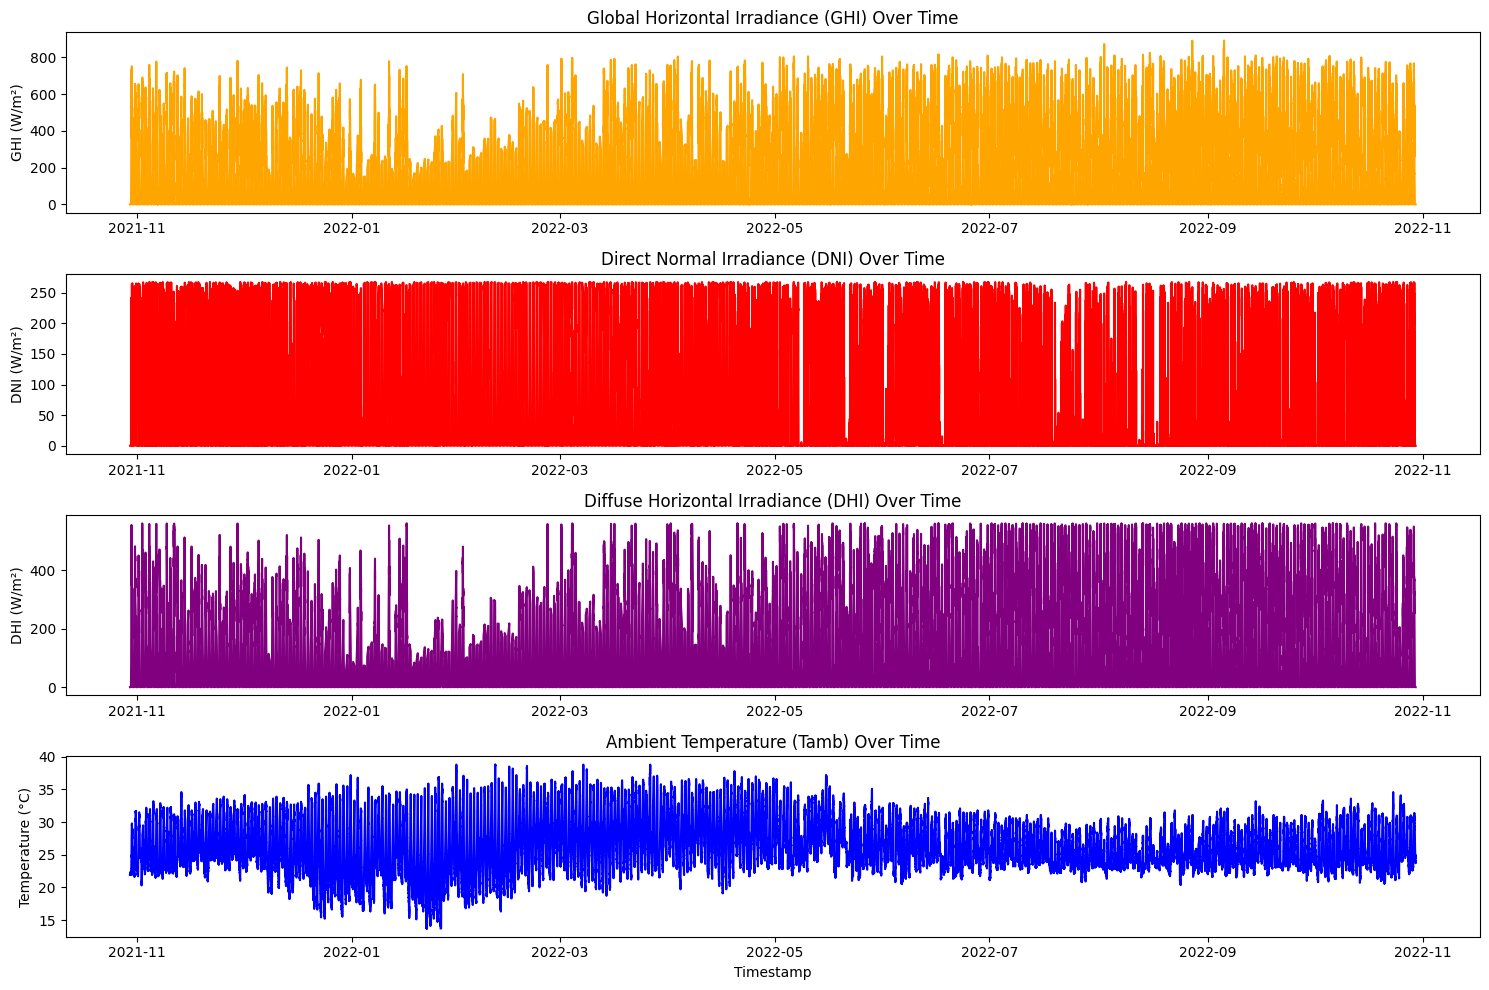

In [9]:
cleaned_df=pd.read_csv("../data/processed/sierraleone_clean.csv")
# Convert 'Timestamp' to datetime if not already
if not pd.api.types.is_datetime64_any_dtype(cleaned_df['Timestamp']):
    cleaned_df['Timestamp'] = pd.to_datetime(cleaned_df['Timestamp'])

# Set 'Timestamp' as index
cleaned_df = cleaned_df.set_index('Timestamp')
#sort the DataFrame by index
cleaned_df=cleaned_df.sort_index()
plt.figure(figsize=(15, 10))

# Plot GHI
plt.subplot(4, 1, 1) 
sns.lineplot(data=cleaned_df, x=cleaned_df.index, y='GHI', color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.ylabel('GHI (W/m²)')
plt.xlabel('') 

# Plot DNI
plt.subplot(4, 1, 2) 
sns.lineplot(data=cleaned_df, x=cleaned_df.index, y='DNI', color='red')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.ylabel('DNI (W/m²)')
plt.xlabel('')

# Plot DHI
plt.subplot(4, 1, 3) 
sns.lineplot(data=cleaned_df, x=cleaned_df.index, y='DHI', color='purple')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.ylabel('DHI (W/m²)')
plt.xlabel('')


# Plot Tamb
plt.subplot(4, 1, 4) 
sns.lineplot(data=cleaned_df, x=cleaned_df.index, y='Tamb', color='blue')
plt.title('Ambient Temperature (Tamb) Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Timestamp')

plt.tight_layout() 
plt.show()




 **Demonstrating the impact of cleaning**

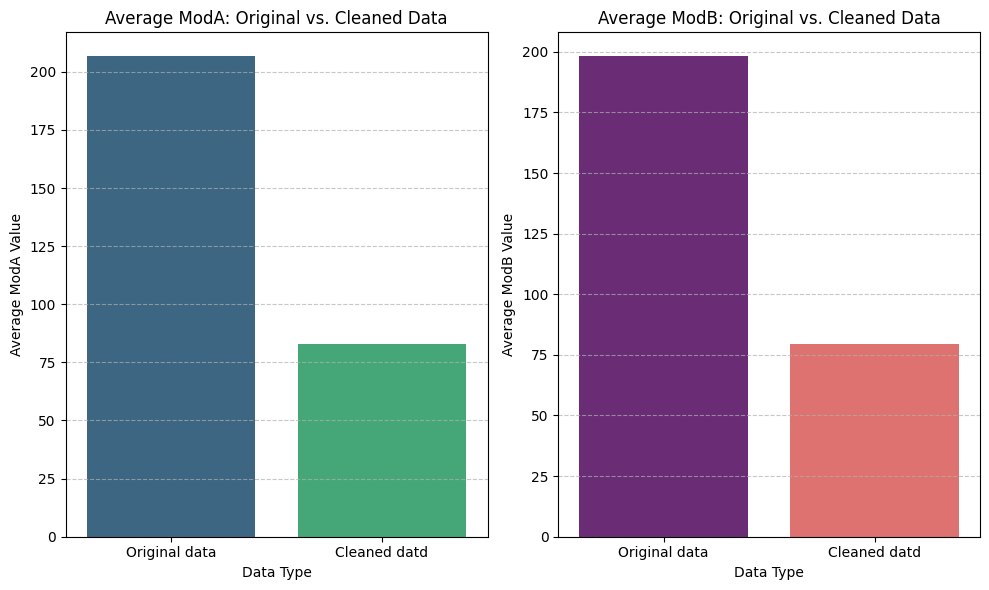

In [10]:
df=pd.read_csv("../data/raw/sierraleone-bumbuna.csv")
cleaned_df=pd.read_csv("../data/processed/sierraleone_clean.csv")

# Calculate average ModA and ModB for original data
avg_moda_original = df['ModA'].mean()
avg_modb_original = df['ModB'].mean()

# Calculate average ModA and ModB for cleaned data
avg_moda_cleaned = cleaned_df['ModA'].mean()
avg_modb_cleaned = cleaned_df['ModB'].mean()

# Create a DataFrame for plotting t
plot_data = pd.DataFrame({
    'Data Type': ['Original data', 'Cleaned datd'],
    'Average ModA': [avg_moda_original, avg_moda_cleaned],
    'Average ModB': [avg_modb_original, avg_modb_cleaned]
})


#Plotting the Cleaning Results 

plt.figure(figsize=(10, 6))

# Plot for Average ModA
plt.subplot(1, 2, 1) 
sns.barplot(x='Data Type', y='Average ModA', data=plot_data, palette='viridis', hue='Data Type', legend=False)
plt.title('Average ModA: Original vs. Cleaned Data')
plt.ylabel('Average ModA Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Average ModB
plt.subplot(1, 2, 2) 
sns.barplot(x='Data Type', y='Average ModB', data=plot_data, palette='magma', hue='Data Type', legend=False)
plt.title('Average ModB: Original vs. Cleaned Data')
plt.ylabel('Average ModB Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Correlation & Relationship Analysis**

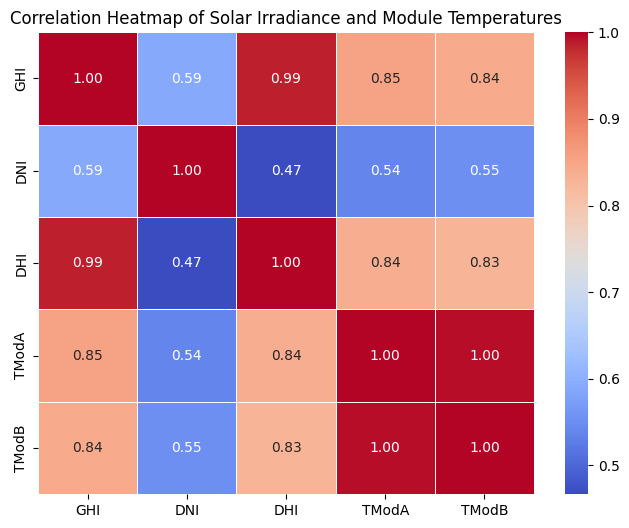

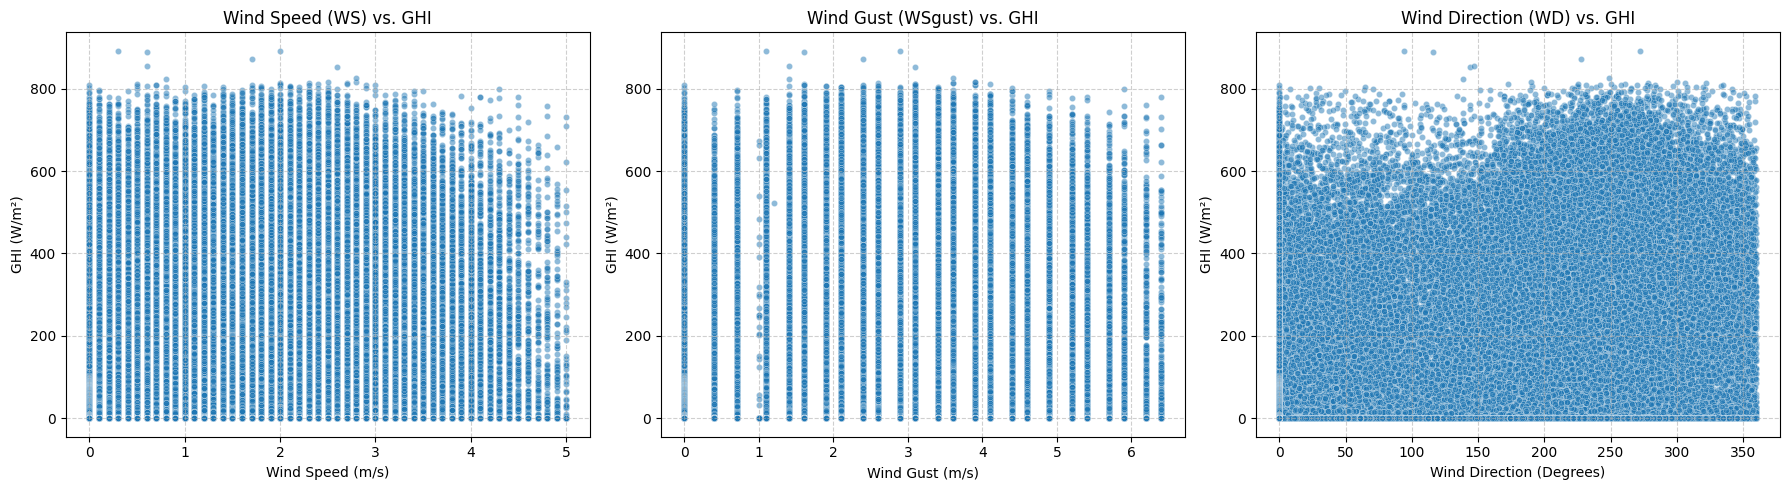

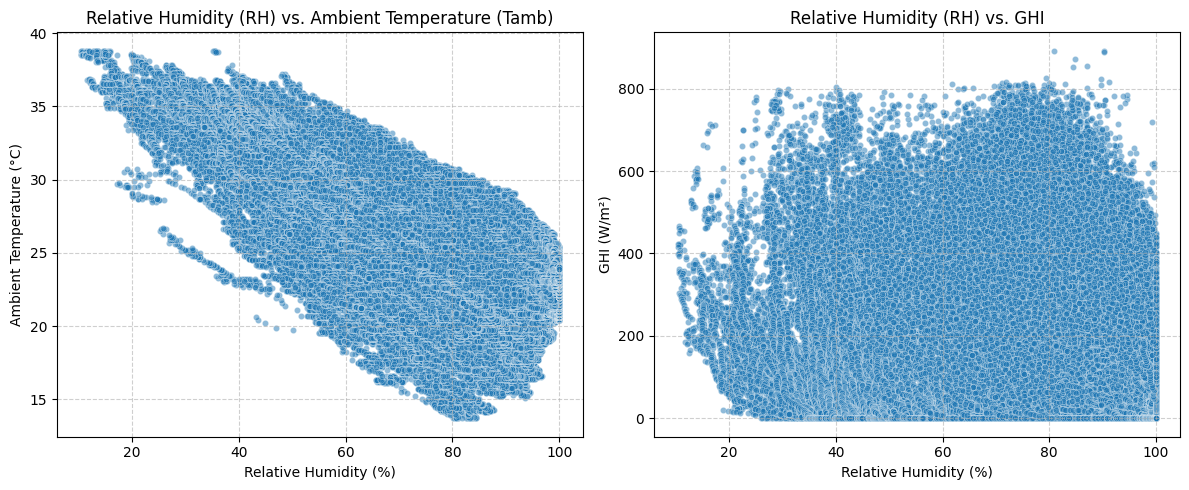

In [11]:
cleaned_df=pd.read_csv("../data/processed/sierraleone_clean.csv")
correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = cleaned_df[correlation_cols].corr()

# Plotting the Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Solar Irradiance and Module Temperatures')
plt.show()

#Scatter plots: WS, WSgust, WD vs. GHI
plt.figure(figsize=(18, 5))

# WS vs. GHI
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=cleaned_df, alpha=0.5, s=20)
plt.title('Wind Speed (WS) vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, linestyle='--', alpha=0.6)

# WSgust vs. GHI
plt.subplot(1, 3, 2)
sns.scatterplot(x='WSgust', y='GHI', data=cleaned_df, alpha=0.5, s=20)
plt.title('Wind Gust (WSgust) vs. GHI')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, linestyle='--', alpha=0.6)

# WD vs. GHI

plt.subplot(1, 3, 3)
sns.scatterplot(x='WD', y='GHI', data=cleaned_df, alpha=0.5, s=20)
plt.title('Wind Direction (WD) vs. GHI')
plt.xlabel('Wind Direction (Degrees)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
#  Scatter plots: RH vs. Tamb and RH vs. GHI 
plt.figure(figsize=(12, 5))

# RH vs. Tamb
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=cleaned_df, alpha=0.5, s=20)
plt.title('Relative Humidity (RH) vs. Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.6)

# RH vs. GHI
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=cleaned_df, alpha=0.5, s=20)
plt.title('Relative Humidity (RH) vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()